In [1]:
import numpy as np
from scipy.special import erf
import os
import sys
import time
import copy
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')

# Add the src directory to sys.path
sys.path.append(src_dir)

from estimator.Laplace import LaplaceEstimator
from analysis.commons import batch_estimator_estimated_delta, compute_bootstrap_range
from utils.constants import WORKERS

In [2]:
def generate_default_configuration():
    epsilon = 0.1
    claimed_epsilon = 1
    gamma = 0.01

    dataset_settings = {
        'database_0': [0],
        'database_1': [1],
        'sensitivity': 1.,
        'epsilon': epsilon,
        'claimed_epsilon': claimed_epsilon,
        'delta': 0
    }

    kwargs = {
        'dataset_settings': dataset_settings, 
        'gamma': gamma,
        'training_set_size': 10**7, 'validation_set_size': 10**7
    }
    return kwargs

def store_array_str(data_array):
    converted_str = np.array_str(data_array)
    converted_str = converted_str.replace(' ',',')
    return converted_str

In [3]:
logfile_path = os.path.join(log_dir, 'kNN-noisy_histogram-default.log')

logging.basicConfig(
        level=logging.CRITICAL,
        format="%(asctime)s %(message)s",
        handlers=[
            logging.FileHandler(logfile_path),
            logging.StreamHandler()
        ]
    )

logging.info('Initialize the experimental settings')
kwargs = generate_default_configuration()

In [4]:
claimed_epsilon_list = np.hstack((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 10, 0.5)))
input_list = []
for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    input_ = copy.deepcopy({'estimator_cls': LaplaceEstimator, 'config': kwargs})
    input_list.append(input_)

estimated_delta = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=60)

2024-12-08 20:45:58,683 Compute the empirical error rate requires 283.5810 seconds
2024-12-08 20:45:59,399 Compute the empirical error rate requires 285.8591 seconds
2024-12-08 20:45:59,426 Compute the empirical error rate requires 284.6932 seconds
2024-12-08 20:45:59,621 Compute the empirical error rate requires 284.2944 seconds
2024-12-08 20:46:00,041 Compute the empirical error rate requires 284.7070 seconds
2024-12-08 20:46:00,393 Compute the empirical error rate requires 286.7089 seconds
2024-12-08 20:46:00,568 Compute the empirical error rate requires 285.3442 seconds
2024-12-08 20:46:00,592 Compute the empirical error rate requires 285.3111 seconds
2024-12-08 20:46:00,597 Compute the empirical error rate requires 285.5451 seconds
2024-12-08 20:46:00,890 Compute the empirical error rate requires 286.7853 seconds
2024-12-08 20:46:01,740 Compute the empirical error rate requires 287.7616 seconds
2024-12-08 20:46:02,300 Compute the empirical error rate requires 288.0807 seconds
2024

In [7]:
kwargs['dataset_settings']['epsilon'] = 10
claimed_epsilon_list = np.hstack((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 10, 0.5)))
input_list = []
for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    input_ = copy.deepcopy({'estimator_cls': LaplaceEstimator, 'config': kwargs})
    input_list.append(input_)

buggy_estimated_delta = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=60)

2024-12-08 20:51:26,220 Compute the empirical error rate requires 286.5897 seconds
2024-12-08 20:51:26,985 Compute the empirical error rate requires 287.8016 seconds
2024-12-08 20:51:26,997 Compute the empirical error rate requires 287.6772 seconds
2024-12-08 20:51:27,569 Compute the empirical error rate requires 287.9422 seconds
2024-12-08 20:51:27,729 Compute the empirical error rate requires 288.4117 seconds
2024-12-08 20:51:27,854 Compute the empirical error rate requires 287.0061 seconds
2024-12-08 20:51:28,266 Compute the empirical error rate requires 288.6182 seconds
2024-12-08 20:51:28,415 Compute the empirical error rate requires 288.7212 seconds
2024-12-08 20:51:29,040 Compute the empirical error rate requires 288.6782 seconds
2024-12-08 20:51:30,224 Compute the empirical error rate requires 290.0240 seconds
2024-12-08 20:51:31,906 Compute the empirical error rate requires 292.1893 seconds
2024-12-08 20:51:32,257 Compute the empirical error rate requires 292.9257 seconds
2024

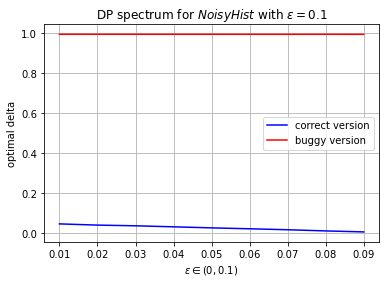

In [8]:
figfile_path = os.path.join(fig_dir, 'Noisy_hist.png')
claimed_epsilon_list = np.hstack((np.arange(0.01, 0.1, 0.01)))

plt.title(r'DP spectrum for $NoisyHist$ with $\epsilon=0.1$')
plt.xlabel(r"$\epsilon \in (0,0.1)$")
plt.ylabel("optimal delta")
plt.grid()

plt.plot(claimed_epsilon_list, estimated_delta[:claimed_epsilon_list.shape[0]] , color ="blue", label=r"correct version")
plt.plot(claimed_epsilon_list, buggy_estimated_delta[:claimed_epsilon_list.shape[0]] , color ="red", label=r"buggy version")
plt.legend(loc='best' )
plt.savefig(figfile_path, bbox_inches = 'tight', dpi = 150);
plt.show()